In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm

In [3]:
df = pd.read_csv('Datasets/us_airline_carrier_passenger.csv')
df.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   month       240 non-null    object
 1   passengers  240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


In [5]:
df['month'] = pd.to_datetime(df['month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       240 non-null    datetime64[ns]
 1   passengers  240 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.9 KB


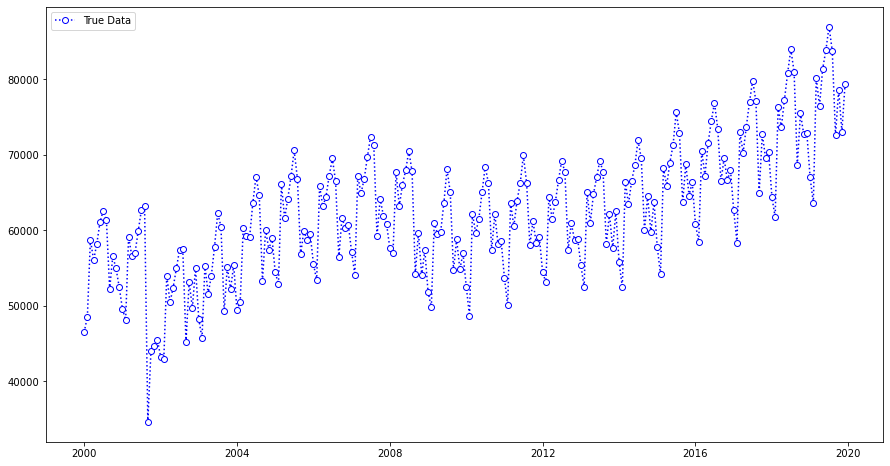

In [6]:
plt.figure(figsize=(15,8))
plt.plot(df['month'], df['passengers'], 'o:', color='blue', markerfacecolor='w')
plt.legend(['True Data'])
plt.show()

In [7]:
import datetime
df_train = df[df['month'] <= datetime.datetime.strptime('2016-12-01', '%Y-%m-%d')]
df_test = df[df['month'] > datetime.datetime.strptime('2016-12-01', '%Y-%m-%d')]

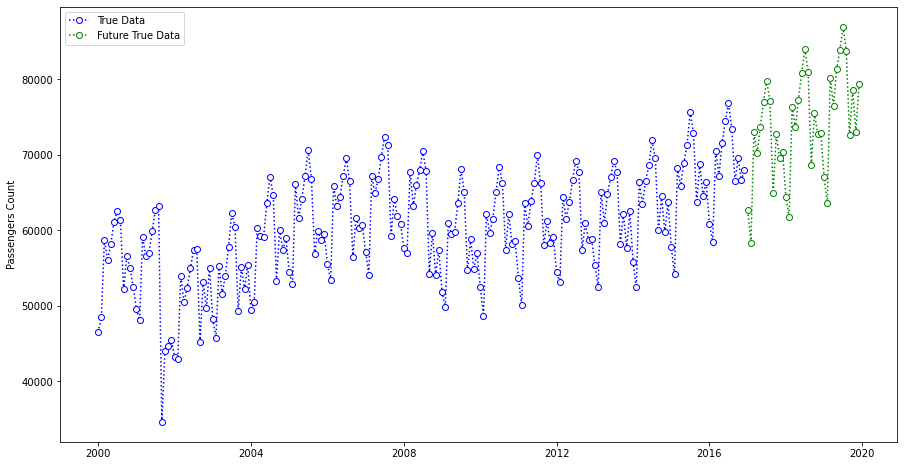

In [8]:
plt.figure(figsize=(15,8))
plt.plot(df_train['month'], df_train['passengers'], 'bo:', markerfacecolor='w')
plt.plot(df_test['month'], df_test['passengers'], 'go:', markerfacecolor='w')
plt.legend(['True Data', 'Future True Data'])
plt.ylabel('Passengers Count')
plt.show()

In [9]:
df_train.head()

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201


In [10]:
df_test.tail()

,month,passengers
235,2019-08-01,83784
236,2019-09-01,72590
237,2019-10-01,78617
238,2019-11-01,73074
239,2019-12-01,79302


In [16]:
def weighted_moving_average(x):
    weights = np.arange(len(x),0,-1)
    num = np.sum(x * weights)
    den = np.sum(weights)
    wma = num / den
    return wma

In [17]:
weighted_moving_average([533,52,22])

287.5

In [18]:
sample = df_train.head()

In [19]:
sample['passengers'].rolling(window=3).apply(weighted_moving_average)

0             NaN
1             NaN
2    49215.333333
3    53189.833333
4    57759.833333
Name: passengers, dtype: float64

In [22]:
df_train['fitted_3'] = df_train['passengers'].rolling(window=3).apply(weighted_moving_average)
df_train['fitted_62'] = df_train['passengers'].rolling(window=62).apply(weighted_moving_average)

In [23]:
df_train.tail()

,month,passengers,fitted_3,fitted_62
199,2016-08-01,73450,75121.333333,62448.992320
200,2016-09-01,66477,74005.833333,62259.105991
201,2016-10-01,69539,70473.833333,62185.545315
202,2016-11-01,66591,67516.666667,62377.650282
203,2016-12-01,67983,68297.000000,62473.703021


In [24]:
df_test['forecasted_3'] = 68297.000000
df_test['forecasted_62'] =62473.703021

In [25]:
error_3 = df_train['passengers'] - df_train['fitted_3']
me_3 = 1.96 * error_3.std()

error_62 = df_train['passengers'] - df_train['fitted_62']
me_62 = 1.96 * error_3.std()

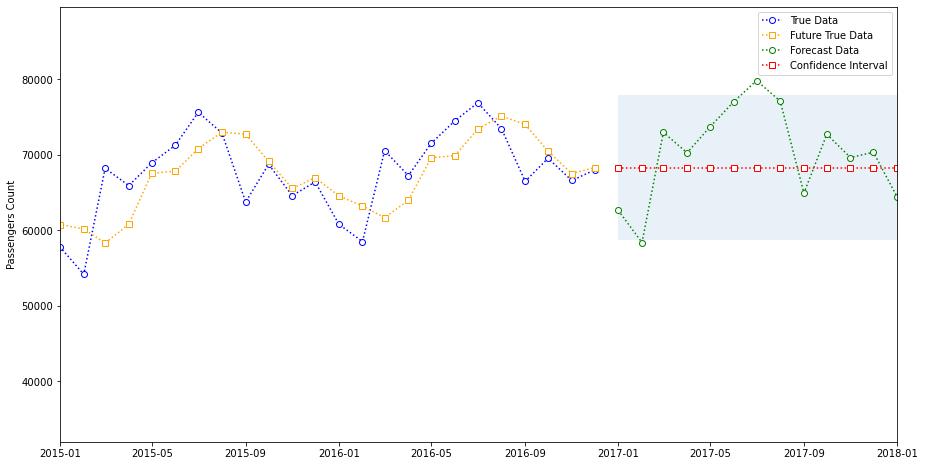

In [28]:
plt.figure(figsize=(15,8))
plt.plot(df_train['month'], df_train['passengers'], 'bo:', markerfacecolor='w')
plt.plot(df_train['month'], df_train['fitted_3'], 's:', color='orange', markerfacecolor='w')

plt.plot(df_test['month'], df_test['passengers'], 'go:', markerfacecolor='w')
plt.plot(df_test['month'], df_test['forecasted_3'], 's:',color='red', markerfacecolor='w')

# Fill Confidence Interval
plt.fill_between(df_test['month'], (df_test['forecasted_3'] + me_3) , (df_test['forecasted_3'] - me_3), alpha=0.1)

# Scaling
start_date = datetime.datetime.strptime("2015-01-01", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2018-01-01", "%Y-%m-%d")

plt.axis(xmin=start_date, xmax=end_date)
plt.legend(['True Data', 'Future True Data', 'Forecast Data', 'Confidence Interval'])
plt.ylabel('Passengers Count')
plt.show()

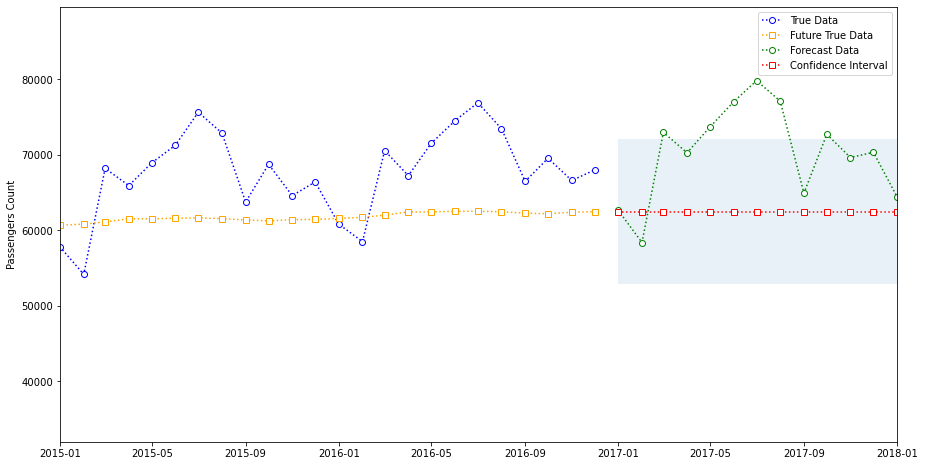

In [29]:
plt.figure(figsize=(15,8))
plt.plot(df_train['month'], df_train['passengers'], 'bo:', markerfacecolor='w')
plt.plot(df_train['month'], df_train['fitted_62'], 's:', color='orange', markerfacecolor='w')

plt.plot(df_test['month'], df_test['passengers'], 'go:', markerfacecolor='w')
plt.plot(df_test['month'], df_test['forecasted_62'], 's:',color='red', markerfacecolor='w')

# Fill Confidence Interval
plt.fill_between(df_test['month'], (df_test['forecasted_62'] + me_62) , (df_test['forecasted_62'] - me_62), alpha=0.1)

# Scaling
start_date = datetime.datetime.strptime("2015-01-01", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2018-01-01", "%Y-%m-%d")

plt.axis(xmin=start_date, xmax=end_date)
plt.legend(['True Data', 'Future True Data', 'Forecast Data', 'Confidence Interval'])
plt.ylabel('Passengers Count')
plt.show()